# Tracer concentration on shelf bottom

Map hcw on shelf by looking at bottom cells and multiplying their concentration by their area.


The algorithm:

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import pandas as pd

import os 

import sys

import seaborn as sns


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
#Base case, iso =1 , No 3d diff.
#CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run03/gridGlob.nc'

CanyonGridOut = Dataset(CanyonGrid)

NoCCanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run07/gridGlob.nc'

NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)


In [5]:
labelsListCanyon = ['kiso = 10',
                    'Base', 
                    'kiso = 0.1',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'kv=3.8E-5',
                    'kv=2.8E-5',
                    'kv_can=1E-7, kv_out=1E-3',
                    'kv_can=1E-7, kv_out=1E-4',
                    'kv_can=1E-5, kv_out=1E-3',
                    'kv_can=1E-5, kv_out=1E-4',
]

labelsListFlat = ['Base flat',
                  'f=7.68E-5 flat',
                  'f=4.84E-5 flat',
                  'kv=1E-4 flat',
                  'kv=1E-3 flat',
                  'N=3.9E-3 flat',
                  'N=6.3E-3 flat',
                  'N=3.0E-3 flat',
                  'kv=1E-7 flat',
]


In [6]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')
bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')
rANoC = rout.getField(NoCCanyonGrid, 'rA')
rA = rout.getField(CanyonGrid, 'rA')

z = CanyonStateOut.variables['Z']

time = CanyonStateOut.variables['T']

## Area-weighted average concentration

$$\frac{\sum_{i=1}^{n} C_iA_i}{A_{shelf}}$$

where $n$ is the total number of cells that constitute the shelf bottom, $C_i$ is the concentration in the $i-th$ cell, $A_i$ its area and $A_{shelf}$ the sum of all the cell areas.

In [7]:
fileCanyon = 'results/metricsDataFrames/bottomConcentrationAreaCanyonRuns.csv'

df = pd.read_csv(fileCanyon)
columns = df.columns.values.tolist()

time = df['day']

bottomConcCanyon = np.empty((len(time),len(columns[2:])))

ii=0

for col in columns[2:]:
    
    bottomConcCanyon[:,ii] = df[col] 
    ii=ii+1


In [8]:
fileFlat = 'results/metricsDataFrames/bottomConcentrationAreaFlatRuns.csv'

df2 = pd.read_csv(fileFlat)
columns2 = df2.columns.values.tolist()

time2 = df2['day']

bottomConcFlat = np.empty((len(time2),len(columns2[2:])))

ii=0
for col in columns2[2:]:
    bottomConcFlat[:,ii] = df2[col] 
    ii=ii+1



In [9]:
colors = ["fresh green","soft green","shamrock green","dark mint green","peacock blue","sapphire","nice blue",
          "coral","tangerine","blood orange","scarlet","mud brown","dark plum","purplish","cerise","amethyst",
          "lavender pink"]
color_pal = sns.xkcd_palette(colors)

sns.set_palette(color_pal)


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


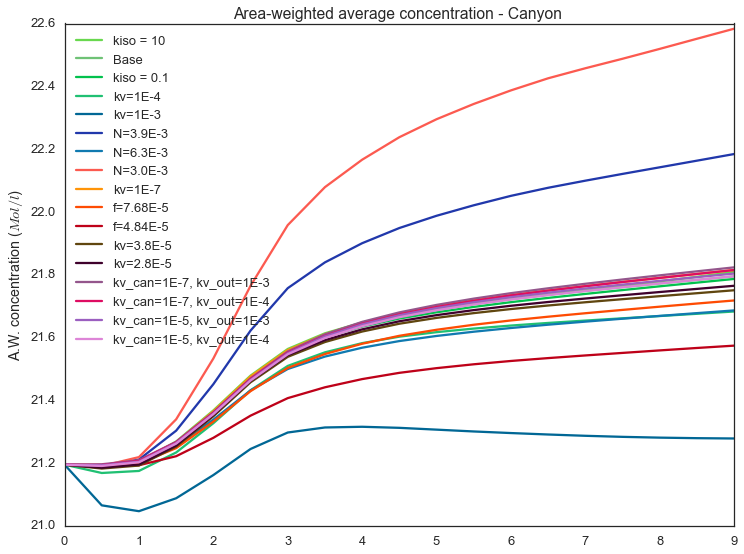

In [10]:
sns.set_context('talk', font_scale=1.0)


times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in range(len(columns[2:])):
    ax1.plot(times,bottomConcCanyon[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


## Canyon effect

In [ ]:
labelsListCanyon = ['kiso = 10',
                    'Base', 
                    'kiso = 0.1',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'kv=3.8E-5',
                    'kv=2.8E-5',
                    'kv_can=1E-7, kv_out=1E-3',
                    'kv_can=1E-7, kv_out=1E-4',
                    'kv_can=1E-5, kv_out=1E-3',
                    'kv_can=1E-5, kv_out=1E-4',
]



In [15]:
df2.columns

Index(['Unnamed: 0', 'day', 'ConcArea07', 'ConcArea22', 'ConcArea23',
       'ConcArea24', 'ConcArea25', 'ConcArea26', 'ConcArea27', 'ConcArea28',
       'ConcArea30'],
      dtype='object')

In [ ]:
'ConcArea02', 'ConcArea03', 'ConcArea04',
       'ConcArea11', 'ConcArea12', 'ConcArea14', 'ConcArea15', 'ConcArea16',
       'ConcArea17', 'ConcArea18', 'ConcArea19', 'ConcArea20', 'ConcArea21',
       'ConcArea3D04', 'ConcArea3D05', 'ConcArea3D06', 'ConcArea3D07'

In [19]:
columns2


['Unnamed: 0',
 'day',
 'ConcArea07',
 'ConcArea22',
 'ConcArea23',
 'ConcArea24',
 'ConcArea25',
 'ConcArea26',
 'ConcArea27',
 'ConcArea28',
 'ConcArea30']

In [21]:
flatArray = np.empty((len(time),len(labelsListCanyon)))

flatArray[:,0] = bottomConcFlat[:,0]
flatArray[:,1] = bottomConcFlat[:,0]
flatArray[:,2] = bottomConcFlat[:,0]
flatArray[:,3] = bottomConcFlat[:,3]
flatArray[:,4] = bottomConcFlat[:,4]
flatArray[:,5] = bottomConcFlat[:,5]
flatArray[:,6] = bottomConcFlat[:,6]
flatArray[:,7] = bottomConcFlat[:,7]
flatArray[:,8] = bottomConcFlat[:,8]
flatArray[:,9] = bottomConcFlat[:,1]
flatArray[:,10] = bottomConcFlat[:,2]
flatArray[:,11] = bottomConcFlat[:,0]
flatArray[:,12] = bottomConcFlat[:,0]
flatArray[:,13] = bottomConcFlat[:,0]
flatArray[:,14] = bottomConcFlat[:,0]
flatArray[:,15] = bottomConcFlat[:,0]
flatArray[:,16] = bottomConcFlat[:,0]


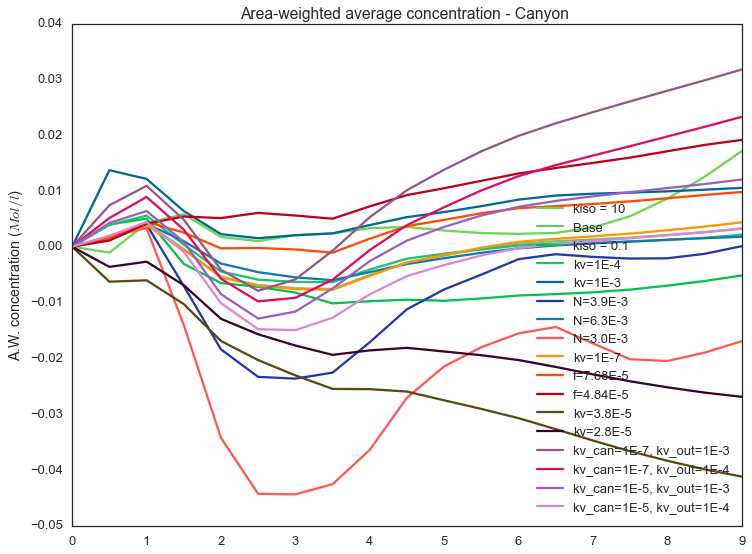

In [22]:
sns.set_context('talk', font_scale=1.0)


times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in range(len(columns[2:])):
    ax1.plot(times,bottomConcCanyon[:,ii]-flatArray[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


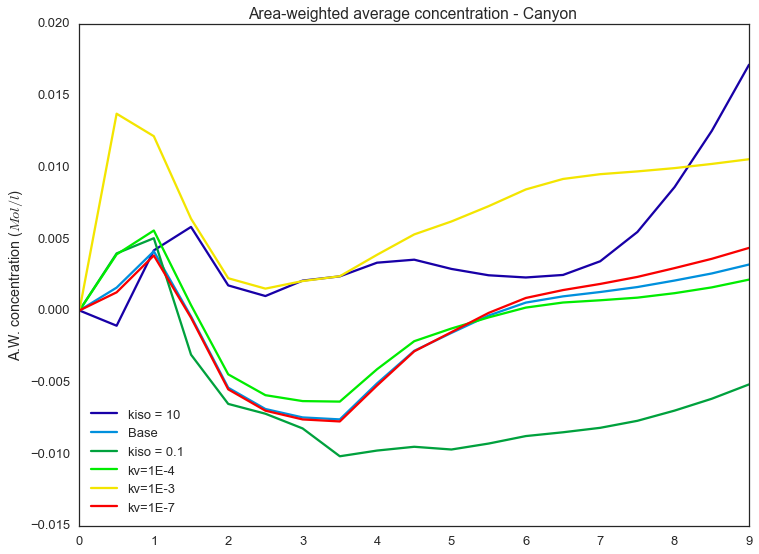

In [26]:

sns.set_palette('spectral')

sns.set_context('talk', font_scale=1.0)

diffList = [0,1,2,3,4,8]

times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyon[:,ii]-flatArray[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


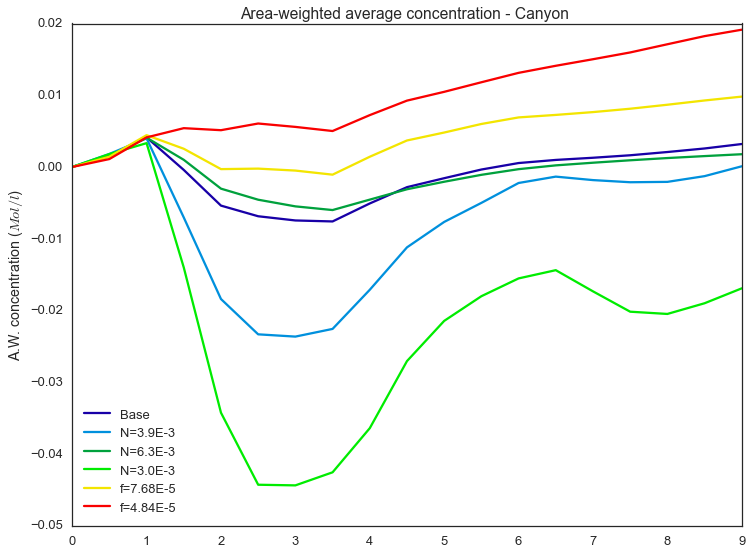

In [27]:
sns.set_palette('spectral')

sns.set_context('talk', font_scale=1.0)

diffList = [1,5,6,7,9,10]

times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyon[:,ii]-flatArray[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


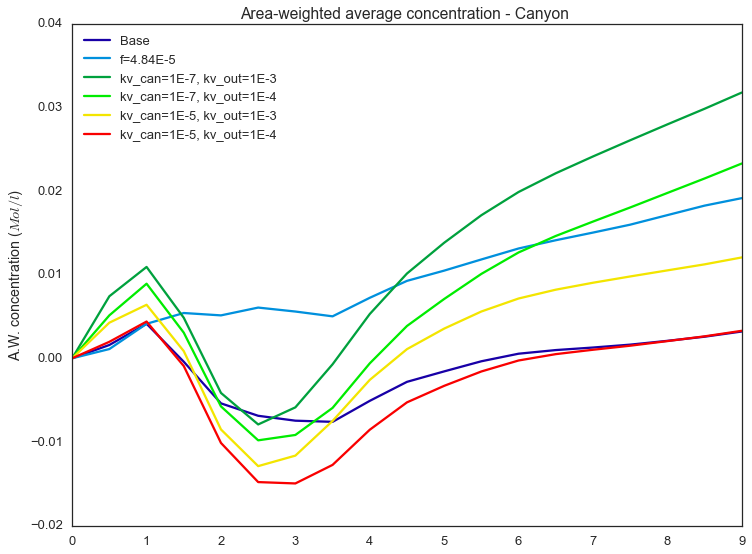

In [28]:
sns.set_palette('spectral')

sns.set_context('talk', font_scale=1.0)

diffList = [1,13,14,15,16]

times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyon[:,ii]-flatArray[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')
